## TASK 1

#### PROBLEM STATEMENT :  Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable

#### Dataset Used : Health and Stroke Risk Factors Dataset

#### Description :

The "Health and Stroke Risk Factors Dataset" is a comprehensive collection of health-related data that provides valuable insights into the factors influencing the risk of stroke in a diverse population. This dataset is a valuable resource for healthcare professionals, researchers, and policymakers seeking to understand the dynamics of stroke risk and make informed decisions regarding preventive measures and interventions.

#### Columns:

- Gender: This column records the gender of the individuals in the dataset, allowing for gender-based analysis of stroke risk factors.

- Age: Age is a crucial factor in stroke risk assessment. This column provides information about the age of the individuals, enabling age-related insights and trend analysis.

- Hypertension: Hypertension, or high blood pressure, is a significant risk factor for strokes. This binary column indicates whether an individual has been diagnosed with hypertension (1) or not (0).

- Heart Disease: Heart disease is another major contributor to stroke risk. This binary column signifies whether an individual has a history of heart disease (1) or not (0).

- Ever Married: Marital status can play a role in health outcomes. This column captures whether an individual has ever been married (Yes/No).

- Work Type: Understanding an individual's work type helps in assessing lifestyle factors. This categorical column categorizes the type of work an individual is engaged in.

- Residence Type: Residence type, whether urban or rural, can impact health conditions. This categorical column indicates an individual's residence type.

- Average Glucose Level: This numeric column records the average glucose levels in an individual's blood, which is crucial for diabetes assessment and stroke risk.

- BMI (Body Mass Index): BMI is a measure of body fat based on an individual's weight and height. This numeric column provides insights into the individuals' weight status.

- Smoking Status: Smoking is a well-known risk factor for strokes. This categorical column categorizes an individual's smoking status into various categories (e.g., "smokes," "formerly smoked," "never smoked").

- Stroke: The presence or absence of stroke is the primary outcome variable. This binary column indicates whether an individual has experienced a stroke (1) or not (0).



In [6]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset dataset
data = pd.read_csv("C:/Users/Angela/OneDrive/Desktop/SEM-2/Machine Learning/healthcare.csv")
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Performing EDA

In [3]:
# Check data types and missing values
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [4]:
# Descriptive statistics
print(data.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [7]:
#Selecting the numerical columns:
print("The Integer columns are: ")
data_numerical=data.select_dtypes(np.number)
data_numerical

The Integer columns are: 


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [19]:
#  Correlation matrix (for continuous variables)
correlation_matrix = data_numerical.corr()
correlation_matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


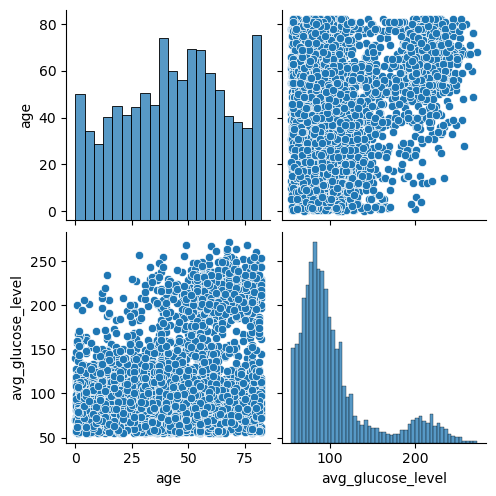

In [29]:
# Pairplot(for continuous variable)

sns.pairplot(data=data, vars=["age","avg_glucose_level"])


In [16]:
# Checking the names of all the columns
data.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Checking the categorical features

In [17]:
data['gender'].nunique()

3

In [30]:
# Frequency of each gender
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

#### Bar graph 

<AxesSubplot:xlabel='gender', ylabel='count'>

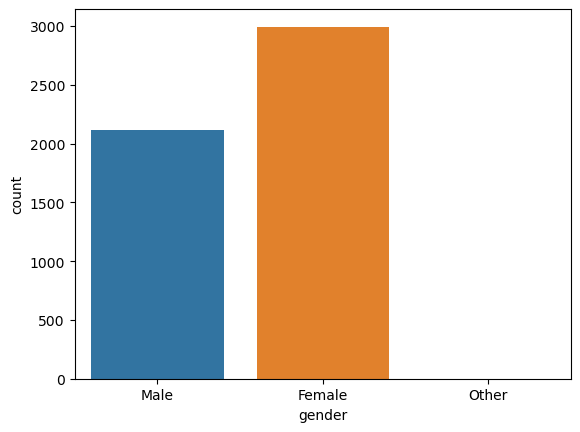

In [34]:
# Visualization: Create bar chart 

# Bar Chart for "gender" distribution
sns.countplot(data=data,x='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

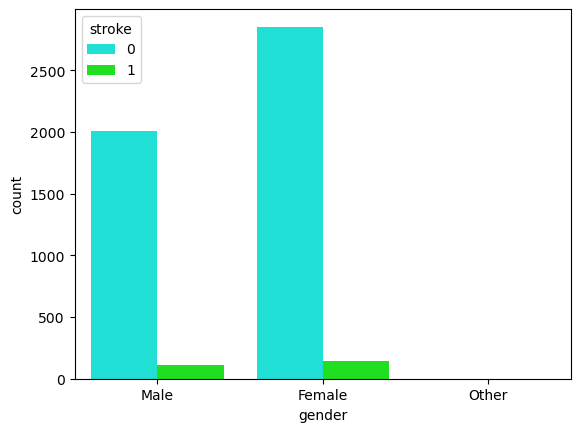

In [37]:
#this plot will help to analyse how gender will affect chances of stroke

sns.countplot(data=data,x='gender',hue='stroke',palette=['#00FFF0', '#00FF00'])

#### Histogram

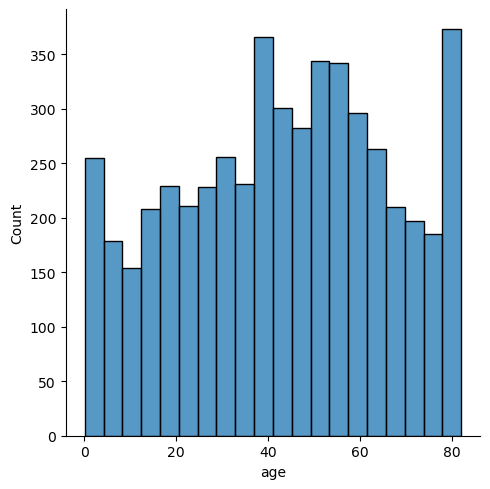

In [40]:
# Create a histogram for a continuous variable

sns.displot(data['age'])

<AxesSubplot:xlabel='stroke', ylabel='count'>

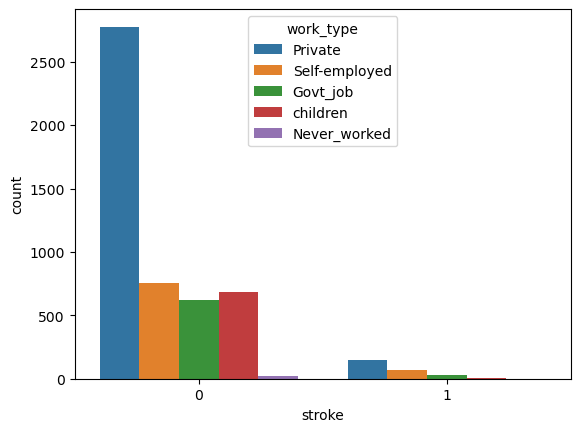

In [42]:
# Bargraph showing people from different "work_type" having "stroke" 
sns.countplot(data=data,x='stroke',hue='work_type')

<AxesSubplot:xlabel='stroke', ylabel='age'>

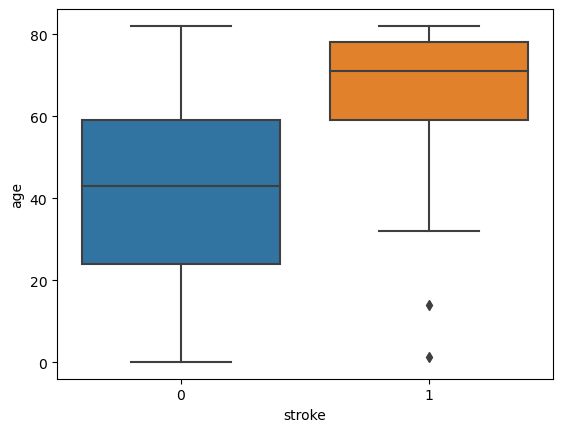

In [43]:
#boxplot of variable age with respect to stroke
sns.boxplot(data=data,x='stroke',y='age')